# Load data

# Try two kernel

In [14]:
from IPython.display import SVG, display
from tqdm import tqdm
from pyclustertend import hopkins,ivat
from tqdm import tqdm


import hdbscan
import umap
import pickle
import os
import itertools
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [15]:
gene_expression = pd.read_csv(
    "/data/g0017139/Set1/CCLE__Affy_hgu133plus2_QCed_mRNA_NoDuplicates_CleanedIdentifiers_RMA-sketch_genelevel_using_jetscore.txt",
    sep=None, engine='python', header=0,
)
gene_expression = gene_expression.T

In [16]:
gene_expression.shape

(1067, 19635)

In [17]:
gene_expression

1         2         9       \
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A01_436578.CEL  4.223429  3.674479  7.277365   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A02_436580.CEL  4.384075  3.750469  6.997519   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A03_436582.CEL  6.783196  3.767826  3.897323   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A05_436586.CEL  4.476213  4.029830  9.350321   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A06_436588.CEL  5.596887  3.794230  9.037694   
...                                                   ...       ...       ...   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H07_474624.CEL  7.020229  3.604623  9.552231   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H09_474734.CEL  5.981265  3.853859  8.240386   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H10_474614.CEL  4.786461  5.602934  8.057336   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H11_474690.CEL  5.318138  3.728012  8.798405   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H12_474618.CEL  4.596561  3.777780  7.924534   

                                                   10        12        13      \
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A01_436578.CEL  4.145208  4.029598  3.433433   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A02_436580.CEL  5.128134  3.978323  4.304716   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A03_436582.CEL  4.133214  4.129925  3.647417   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A05_436586.CEL  4.497987  4.521013  3.595288   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A06_436588.CEL  4.560074  3.839451  3.591908   
...                                                   ...       ...       ...   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H07_474624.CEL  3.967111  4.015805  3.493510   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H09_474734.CEL  4.211769  3.921458  3.690866   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H10_474614.CEL  4.185823  5.254947  3.398607   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H11_474690.CEL  4.186391  4.366862  3.596459   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H12_474618.CEL  4.135966  4.690266  3.653206   

                                                   14        15      \
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A01_436578.CEL  8.946383  3.249680   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A02_436580.CEL  8.948517  3.416038   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A03_436582.CEL  8.780586  3.735504   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A05_436586.CEL  9.101276  3.520743   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A06_436588.CEL  9.559303  3.654630   
...                                                   ...       ...   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H07_474624.CEL  7.959359  3.871260   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H09_474734.CEL  9.061742  3.469436   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H10_474614.CEL  8.640023  3.380242   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H11_474690.CEL  9.206282  3.345551   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H12_474618.CEL  7.835416  3.477349   

                                                    16        18      ...  \
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A01_436578.CEL  10.276116  8.101744  ...   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A02_436580.CEL   9.622012  5.498473  ...   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A03_436582.CEL   9.370273  3.738432  ...   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A05_436586.CEL   9.955727  5.768418  ...   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A06_436588.CEL   9.934966  5.939260  ...   
...                                                    ...       ...  ...   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H07_474624.CEL  11.628972  7.348019  ...   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H09_474734.CEL  10.899650  9.200349  ...   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H10_474614.CEL  10.177668  8.707979  ...   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H11_474690.CEL  11.897365  5.178586  ...   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_H12_474618.CEL  11.097214  5.996493  ...   

                                                   10524      10938   \
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A01_436578.CEL  7.975829   7.666894   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A02_436580.CEL  7.875326   8.847765   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A03_436582.CEL  7.569357   7.408654   
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_A05_43

In [18]:
Entrez_Map = pd.read_csv('/data/g0017139/Set1/Entrezid_mapping_using_org_Hs_eg_db_03052021.txt',
                               sep=None, engine='python', header=0,
)
Entrez_Map.sort_values(['CHR_Mapping', 'BP_Mapping'], axis=0, inplace=True)
Entrez_Map

mapped_entrez_v1  CHR_Mapping  BP_startloc    BP_endloc  \
1               653635            1     14361.00     29370.00   
11               79501            1     69090.00     70008.00   
128          100132287            1    490755.00    495445.00   
150             729759            1    568227.00    569166.00   
168          101928626            1    627379.00    629009.00   
...                ...          ...          ...          ...   
4446            474148           24  24832607.50  24837505.00   
4447            253175           24  24833813.25  24836316.75   
4448              9085           24  24833813.25  24836316.75   
4449            114758           24  24833170.00  24836968.00   
4450            401634           24  24832638.00  24837503.00   

      sense_or_antisense                                           GENENAME  \
1                     -1                  WASP family homolog 7, pseudogene   
11                     1   olfactory receptor family 4 subfamily F member 5   
128                   -1                       uncharacterized LOC100132287   
150                   -1  olfactory receptor family 4 subfamily F member 29   
168                   -1                       uncharacterized LOC101928626   
...                  ...                                                ...   
4446                   1            testis-specific transcript, Y-linked 3B   
4447                   1                           chromodomain Y-linked 1B   
4448                   1                            chromodomain Y-linked 1   
4449                   1                        CSPG4 pseudogene 1 Y-linked   
4450                   1                       GOLGA2 pseudogene 3 Y-linked   

            SYMBOL   BP_Mapping  
1           WASH7P     21865.50  
11           OR4F5     69549.00  
128   LOC100132287    493100.00  
150         OR4F29    568696.50  
168   LOC101928626    628194.00  
...            ...          ...  
4446        TTTY3B  24835056.25  
4447         CDY1B  24835065.00  
4448          CDY1  24835065.00  
4449      CSPG4P1Y  24835069.00  
4450     GOLGA2P3Y  24835070.50  

[22347 rows x 8 columns]

In [19]:
TumorType = pd.read_csv('/data/g0017139/Set1/CCLE__Sample_To_TumorType.csv',
                               sep=None, engine='python', header=0,
                       )

TumorType = TumorType.set_index('GSM_IDENTIFIER')
TumorType

TYPE  \
GSM_IDENTIFIER                                                      
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_G03_436510.CEL     Breast cancer   
MAKER_p_NCLE_RNA7_HG.U133_Plus_2_C07_454622.CEL     Breast cancer   
BUNDS_p_NCLE_RNA5_HG.U133_Plus_2_B03_419876.CEL     Breast cancer   
CASED_p_NCLE_RNA4_HG.U133_Plus_2_C01_383628.CEL     Breast cancer   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_A08_474686.CEL     Breast cancer   
...                                                           ...   
CRAZY_p_NCLE_RNA10_HG.U133_Plus_2_B08_569552.CEL       Urogenital   
BRAKE_p_NCLE_RNA2_HG.U133_Plus_2_E11_241158.CEL        Urogenital   
BUNDS_p_NCLE_RNA5_HG.U133_Plus_2_F03_419766.CEL        Urogenital   
BRAKE_p_NCLE_RNA2_HG.U133_Plus_2_E12_241160.CEL        Urogenital   
METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_C07_24091...     Urogenital   

                                                            Type2  \
GSM_IDENTIFIER                                                      
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_G03_436510.CEL     Breast cancer   
MAKER_p_NCLE_RNA7_HG.U133_Plus_2_C07_454622.CEL     Breast cancer   
BUNDS_p_NCLE_RNA5_HG.U133_Plus_2_B03_419876.CEL     Breast cancer   
CASED_p_NCLE_RNA4_HG.U133_Plus_2_C01_383628.CEL     Breast cancer   
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_A08_474686.CEL     Breast cancer   
...                                                           ...   
CRAZY_p_NCLE_RNA10_HG.U133_Plus_2_B08_569552.CEL       Urogenital   
BRAKE_p_NCLE_RNA2_HG.U133_Plus_2_E11_241158.CEL        Urogenital   
BUNDS_p_NCLE_RNA5_HG.U133_Plus_2_F03_419766.CEL        Urogenital   
BRAKE_p_NCLE_RNA2_HG.U133_Plus_2_E12_241160.CEL        Urogenital   
METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_C07_24091...     Urogenital   

                                                                 TYPE3  
GSM_IDENTIFIER                                                          
AGENT_p_NCLE_RNA6_HG.U133_Plus_2_G03_436510.CEL       Breast carcinoma  
MAKER_p_NCLE_RNA7_HG.U133_Plus_2_C07_454622.CEL       Breast carcinoma  
BUNDS_p_NCLE_RNA5_HG.U133_Plus_2_B03_419876.CEL       Breast carcinoma  
CASED_p_NCLE_RNA4_HG.U133_Plus_2_C01_383628.CEL       Breast carcinoma  
WATCH_p_NCLE_RNA8_HG.U133_Plus_2_A08_474686.CEL       Breast carcinoma  
...                                                                ...  
CRAZY_p_NCLE_RNA10_HG.U133_Plus_2_B08_569552.CEL     Ovarian carcinoma  
BRAKE_p_NCLE_RNA2_HG.U133_Plus_2_E11_241158.CEL     Endometrial cancer  
BUNDS_p_NCLE_RNA5_HG.U133_Plus_2_F03_419766.CEL     Endometrial cancer  
BRAKE_p_NCLE_RNA2_HG.U133_Plus_2_E12_241160.CEL     Endometrial cancer  
METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_C07_24091...   Ovarian carcinoma  

[1011 rows x 3 columns]

# Explore data

In [20]:
scaler = StandardScaler()
normalized = scaler.fit_transform(gene_expression)
pd.DataFrame(normalized, columns=gene_expression.columns, index=gene_expression.index).to_csv("Results/gene_expression_norm.dat", sep = " ",header=False, index=False)

In [72]:
result = pd.concat([gene_expression, TumorType], axis=1)
colorset = {}
colorset1 = {}
for i, x in enumerate(set(result['TYPE'])):
    colorset[x] = plt.get_cmap('tab20')(i)
    colorset1[x] = i
    
colors = [colorset[x] for x in result['TYPE']]
colors1 = [colorset1[x] for x in result['TYPE']]

# PCA

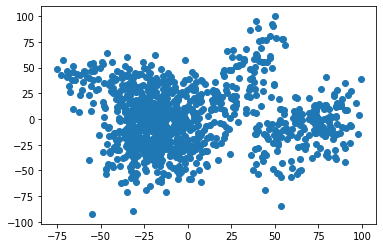

In [21]:
pca = PCA(n_components=None, svd_solver='full')
pca_components = pca.fit_transform(normalized)
plt.scatter(pca_components[:,0], pca_components[:,1])
plt.show()

In [78]:
from babyplots import Babyplot
bp = Babyplot()
bp.add_plot(pca_components[:,[0, 1, 2]].tolist(), "pointCloud", "categories", 
            colors1, options={'size': 4, 'colorScale': 'tab20'})
bp

<IPython.core.display.Javascript object>

# UMAP

In [97]:
?umap.UMAP

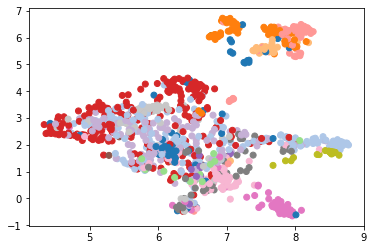

In [110]:
um = umap.UMAP(n_components=3,n_neighbors=90, min_dist=0.1,  random_state=42)
umap_components = um.fit_transform(normalized)
plt.scatter(umap_components[:,0], umap_components[:,1], c=colors)
plt.show()

In [111]:
bp = Babyplot()
bp.add_plot(umap_components[:,[0, 1, 2]].tolist(), "pointCloud", "categories", 
            colors1, options={'size': 4, 'colorScale': 'tab20'})
bp

<IPython.core.display.Javascript object>

In [24]:
results_grid = {}

# K-means

In [27]:
with open('Gridsearch/kmeans.pkl', 'rb') as f:
        results_grid['kMeans'] = pickle.load(f)

In [28]:
results_grid['kMeans'].sort_values('silhouette_score', axis=0, ascending=False).head(4)

silhouette_score  calinski_harabasz_score  davies_bouldin_score   Fit_Time  \
2          0.104322                66.925385              3.049233   4.480711   
3          0.104322                66.925385              3.049233  10.363422   
1          0.104322                66.925385              3.049233   2.701703   
0          0.102786                67.610557              3.551061   3.504158   

   n_clusters  batch_size  
2           2         512  
3           2        1024  
1           2         256  
0           2         128

In [29]:
results_grid['kMeans'].sort_values('calinski_harabasz_score', axis=0, ascending=False).head(4)

silhouette_score  calinski_harabasz_score  davies_bouldin_score   Fit_Time  \
0          0.102786                67.610557              3.551061   3.504158   
1          0.104322                66.925385              3.049233   2.701703   
2          0.104322                66.925385              3.049233   4.480711   
3          0.104322                66.925385              3.049233  10.363422   

   n_clusters  batch_size  
0           2         128  
1           2         256  
2           2         512  
3           2        1024

In [30]:
results_grid['kMeans'].sort_values('davies_bouldin_score', axis=0, ascending=True).head(4)

silhouette_score  calinski_harabasz_score  davies_bouldin_score  \
108          0.025132                13.280505              2.782406   
24           0.014156                27.547398              2.844376   
84          -0.015535                14.354837              2.888636   
92           0.013423                14.681346              2.952778   

     Fit_Time  n_clusters  batch_size  
108  3.960789          29         128  
24   1.712835           8         128  
84   2.801019          23         128  
92   2.884066          25         128

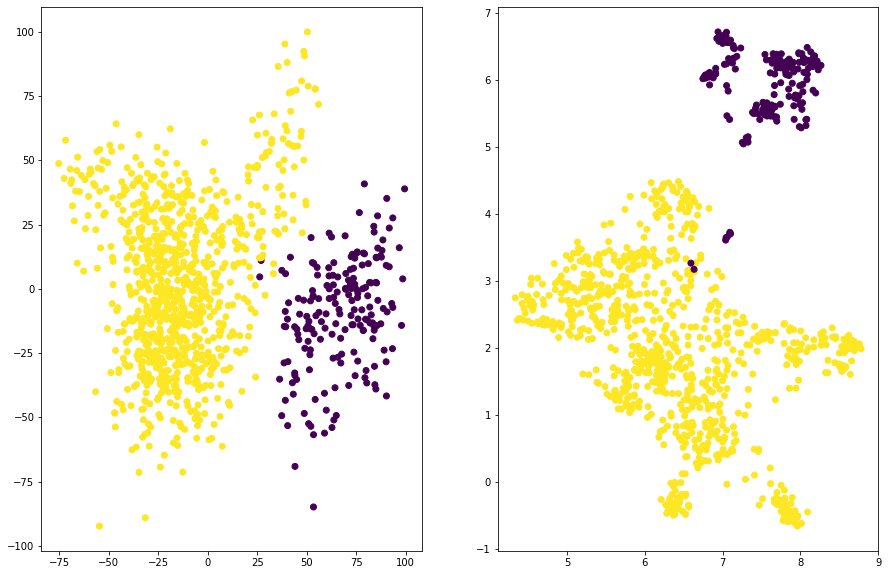

In [135]:
kmeans = MiniBatchKMeans(n_clusters=2,
                         random_state=0,
                         batch_size=256)
kmeans.fit(normalized)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
ax1.scatter(pca_components[:,0], pca_components[:,1], c=kmeans.labels_)
ax2.scatter(umap_components[:,0], umap_components[:,1], c=kmeans.labels_)
plt.show()

In [87]:
bp = Babyplot()
bp.add_plot(umap_components[:,[0, 1, 2]].tolist(), "pointCloud", "categories", 
            kmeans.labels_.tolist(), options={'size': 4, 'colorScale': 'tab20'})
bp

<IPython.core.display.Javascript object>

# UMAP + DBSCAN

In [32]:
with open('Gridsearch/dbscan.pkl', 'rb') as f:
        results_grid['dbscan'] = pickle.load(f)

In [33]:
results_grid['dbscan'].sort_values('silhouette_score', axis=0, ascending=False).head(70)

silhouette_score  calinski_harabasz_score  davies_bouldin_score  \
4109          0.104322                66.925385              3.049233   
1025          0.104322                66.925385              3.049233   
4144          0.104322                66.925385              3.049233   
4190          0.104322                66.925385              3.049233   
4143          0.104322                66.925385              3.049233   
...                ...                      ...                   ...   
548           0.104322                66.925385              3.049233   
546           0.104322                66.925385              3.049233   
543           0.104322                66.925385              3.049233   
545           0.104322                66.925385              3.049233   
544           0.104322                66.925385              3.049233   

       Fit_Time  DimReduction__n_neighbors  DimReduction__min_dist  \
4109  11.263907                         70                     0.0   
1025  14.214439                         30                     0.5   
4144  11.438559                         70                     0.0   
4190  11.158019                         70                     0.0   
4143  11.323849                         70                     0.0   
...         ...                        ...                     ...   
548   11.255038                         30                     0.0   
546   11.249145                         30                     0.0   
543   11.262009                         30                     0.0   
545   11.224259                         30                     0.0   
544   11.410703                         30                     0.0   

      DimReduction__n_components  Clustering__min_cluster_size  \
4109                           1                            25   
1025                          26                           100   
4144                           1                            75   
4190                           1                           100   
4143                           1                            75   
...                          ...                           ...   
548                            1                            75   
546                            1                            75   
543                            1                            75   
545                            1                            75   
544                            1                            75   

      Clustering__min_samples  Clustering__cluster_selection_epsilon  \
4109                      100                                    1.0   
1025                        2                                    1.0   
4144                        2                                    1.0   
4190                       75                                    0.5   
4143                        2                                    0.5   
...                       ...                                    ...   
548                        25                                    0.5   
546                        25                                    0.1   
543                         2                                    0.5   
545                         2                                    1.0   
544                         2                                    1.0   

     Clustering__cluster_selection_method  
4109                                 leaf  
1025                                 leaf  
4144                                  eom  
4190                                  eom  
4143                                 leaf  
...                                   ...  
548                                   eom  
546                                   eom  
543                                  leaf  
545                                  leaf  
544                                   eom  

[70 rows x 11 columns]

In [34]:
results_grid['dbscan'].sort_values('calinski_harabasz_score', axis=0, ascending=False).head(4)

silhouette_score  calinski_harabasz_score  davies_bouldin_score  \
4198          0.104322                66.925385              3.049233   
579           0.104322                66.925385              3.049233   
587           0.104322                66.925385              3.049233   
586           0.104322                66.925385              3.049233   

       Fit_Time  DimReduction__n_neighbors  DimReduction__min_dist  \
4198  11.146416                         70                     0.0   
579   11.185337                         30                     0.0   
587   11.178829                         30                     0.0   
586   11.526709                         30                     0.0   

      DimReduction__n_components  Clustering__min_cluster_size  \
4198                           1                           100   
579                            1                           100   
587                            1                           100   
586                            1                           100   

      Clustering__min_samples  Clustering__cluster_selection_epsilon  \
4198                      100                                    1.0   
579                        25                                    0.5   
587                        50                                    1.0   
586                        50                                    1.0   

     Clustering__cluster_selection_method  
4198                                  eom  
579                                  leaf  
587                                  leaf  
586                                   eom

In [35]:
results_grid['dbscan'].sort_values('davies_bouldin_score', axis=0, ascending=True).head(4)

silhouette_score  calinski_harabasz_score  davies_bouldin_score  \
6005          0.091681                 1.998123              1.625003   
6004          0.091681                 1.998123              1.625003   
604           0.076820                 4.370405              2.052845   
605           0.076820                 4.370405              2.052845   

       Fit_Time  DimReduction__n_neighbors  DimReduction__min_dist  \
6005  24.747158                         90                     0.5   
6004  26.501741                         90                     0.5   
604   20.641079                         30                     0.5   
605   20.899301                         30                     0.5   

      DimReduction__n_components  Clustering__min_cluster_size  \
6005                          76                             2   
6004                          76                             2   
604                           76                             2   
605                           76                             2   

      Clustering__min_samples  Clustering__cluster_selection_epsilon  \
6005                        2                                    1.0   
6004                        2                                    1.0   
604                         2                                    1.0   
605                         2                                    1.0   

     Clustering__cluster_selection_method  
6005                                 leaf  
6004                                  eom  
604                                   eom  
605                                  leaf

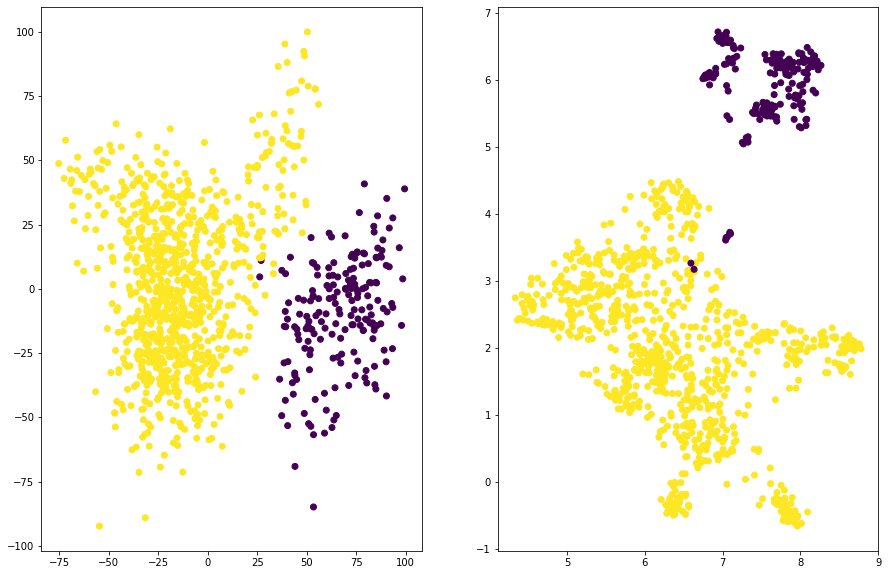

In [136]:
pipe = Pipeline([('DimReduction', 
                  umap.UMAP(
                      n_neighbors=70,
                      min_dist=0.0,
                      n_components=1,
                      random_state=42)),
                 ('Clustering', 
                 hdbscan.HDBSCAN(min_cluster_size=25,
                                min_samples=100,
                                cluster_selection_epsilon=1.0,
                                cluster_selection_method='leaf'))
                ])
pipe.fit(normalized)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
ax1.scatter(pca_components[:,0], pca_components[:,1], c=pipe['Clustering'].labels_)
ax2.scatter(umap_components[:,0], umap_components[:,1], c=pipe['Clustering'].labels_)
plt.show()

In [140]:
bp = Babyplot(show_ui=False)
bp.add_plot(umap_components[:,[0, 1, 2]].tolist(), "pointCloud", "categories", 
            pipe['Clustering'].labels_.tolist(), options={'size': 4, 'colorScale': 'tab20'},
            )
bp

<IPython.core.display.Javascript object>